# LDA - Gensim with TF-IDF

Here, I'm using LDA model from gensim. 

# Importing libraries

In [39]:
from pprint import pprint
import pandas as pd
import numpy as np
from nltk import word_tokenize

#  gensim
import gensim
from gensim import corpora, models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Global Variables

If you're in local machine, you should run this cell below:

In [40]:
BASE_PATH = "./"

If you're in Google Colab, you should run this cell below:

In [41]:
# BASE_PATH = "<ENTER YOUR DRIVE PATH>"

# Preparing Data

In [42]:
import json 

def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

# Load Data
Preprocessed training and testing data from 
[20-news-dataset-pre-processing](https://github.com/nimmitahsin1727/20-news-dataset-pre-processing)

Reading TRAINING from CSV:

In [43]:
training_df = pd.read_csv(f'{BASE_PATH}training_df.csv') 

Reading TESTING from CSV:

In [44]:
testing_df = pd.read_csv(f'{BASE_PATH}testing_df.csv') 

# Corpus Creation

Create data_words with training data

In [45]:
data_words = training_df.data.map(lambda doc: word_tokenize(doc)).values.tolist()

**Bag of Words on the Data set**

Create a dictionary from `data_words` containing the number of times a word appears in the training set.

In [46]:
dictionary = corpora.Dictionary(data_words)

In [47]:
dictionary

Printing some samples from dictionary:

In [48]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

**Gensim filter_extremes**

***Filter out tokens that appear in***

less than 15 documents (absolute number) or
more than 0.5 documents (fraction of total corpus size, not absolute number).

In [49]:
dictionary.filter_extremes(no_below=15, no_above=0.5)

**Gensim doc2bow**

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [50]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data_words]

Preview Bag Of Words for our sample preprocessed document.



In [51]:
bow_doc_123 = bow_corpus[123]

In [13]:
bow_doc_123

[(4, 1),
 (7, 2),
 (19, 1),
 (26, 2),
 (33, 1),
 (45, 1),
 (48, 1),
 (51, 1),
 (82, 1),
 (114, 1),
 (135, 1),
 (150, 1),
 (156, 1),
 (184, 1),
 (187, 1),
 (193, 1),
 (211, 1),
 (228, 1),
 (243, 1),
 (274, 1),
 (276, 2),
 (309, 1),
 (311, 1),
 (321, 1),
 (350, 2),
 (351, 1),
 (381, 1),
 (404, 1),
 (448, 1),
 (458, 1),
 (464, 1),
 (485, 1),
 (487, 1),
 (493, 1),
 (553, 1),
 (556, 1),
 (559, 1),
 (575, 1),
 (587, 1),
 (591, 1),
 (636, 1),
 (687, 1),
 (688, 1),
 (689, 1),
 (734, 2),
 (764, 1),
 (790, 1),
 (828, 1),
 (906, 1),
 (957, 1),
 (1021, 1),
 (1026, 1),
 (1083, 1),
 (1130, 1),
 (1164, 1),
 (1173, 1),
 (1188, 1),
 (1225, 1),
 (1264, 1),
 (1265, 1),
 (1266, 1),
 (1308, 1),
 (1351, 1),
 (1383, 1)]

In [12]:
for i in range(len(bow_doc_123)):
    print(f'Word {bow_doc_123[i][0]} (\"{dictionary[bow_doc_123[i][0]]}\") appears {bow_doc_123[i][1]} time.')

Word 4 ("bike") appears 1 time.
Word 7 ("dod") appears 2 time.
Word 19 ("make") appears 1 time.
Word 26 ("say") appears 2 time.
Word 33 ("work") appears 1 time.
Word 45 ("good") appears 1 time.
Word 48 ("just") appears 1 time.
Word 51 ("like") appears 1 time.
Word 82 ("old") appears 1 time.
Word 114 ("thing") appears 1 time.
Word 135 ("replyto") appears 1 time.
Word 150 ("check") appears 1 time.
Word 156 ("damage") appears 1 time.
Word 184 ("right") appears 1 time.
Word 187 ("spot") appears 1 time.
Word 193 ("today") appears 1 time.
Word 211 ("difference") appears 1 time.
Word 228 ("piece") appears 1 time.
Word 243 ("wish") appears 1 time.
Word 274 ("year") appears 1 time.
Word 276 ("corner") appears 2 time.
Word 309 ("confuse") appears 1 time.
Word 311 ("delete") appears 1 time.
Word 321 ("mike") appears 1 time.
Word 350 ("hit") appears 2 time.
Word 351 ("home") appears 1 time.
Word 381 ("honda") appears 1 time.
Word 404 ("day") appears 1 time.
Word 448 ("list") appears 1 time.
Word 4

**TF-IDF**

Create tf-idf model object using models.TfidfModel on `bow_corpus` and save it to `tfidf`.

In [26]:
tfidf = models.TfidfModel(bow_corpus)

Then apply transformation to the entire corpus and call it `corpus_tfidf`. 

In [15]:
corpus_tfidf = tfidf[bow_corpus]

Finally we preview TF-IDF scores for our first document.

In [16]:
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.09489126715998976),
 (1, 0.041228802758540406),
 (2, 0.07715428997063789),
 (3, 0.14758920597550684),
 (4, 0.10070770263942229),
 (5, 0.11385022401381809),
 (6, 0.10716872118878243),
 (7, 0.047726607296539166),
 (8, 0.820901229577695),
 (9, 0.1164666362552121),
 (10, 0.09961072060371479),
 (11, 0.06929385519173295),
 (12, 0.1316869776947954),
 (13, 0.07155540336586026),
 (14, 0.10587086007883405),
 (15, 0.07668335931854188),
 (16, 0.1225290967934336),
 (17, 0.13858883679180878),
 (18, 0.08726454060961343),
 (19, 0.035006405260232965),
 (20, 0.04539626019819227),
 (21, 0.0889926820797483),
 (22, 0.12036536133205145),
 (23, 0.10173508037814769),
 (24, 0.07255198705502106),
 (25, 0.09361235903184789),
 (26, 0.03758256619598643),
 (27, 0.11556819406164225),
 (28, 0.12876483420491122),
 (29, 0.12486610912807189),
 (30, 0.1367045012371823),
 (31, 0.05324109095911733),
 (32, 0.11934079770069406),
 (33, 0.05054406090088698),
 (34, 0.07621990407260527)]


# DMAFP

### **Running DMAFP using TF-IDF**

#### Train DMAFP model and save it to dmafp_model

In [17]:
# print(f' The model shape: \n {corpus_tfidf.shape}')
# print(f'The model arrray: \n{corpus_tfidf.toarray()}')


### Term Frequency
This is the number of times a word appears in a document divded by the total number of words in the document.
Every document has its own term frequency
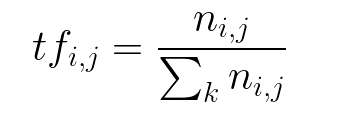

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [23]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

### Inverse Data Frequency
 
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

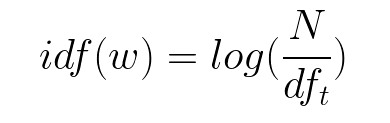

In [20]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict


In [52]:
tfA = computeTF(training_df)
idfs = computeIDF(testing_df)

Lastly, the TF-IDF is simply the TF multiplied by IDF as shown below:

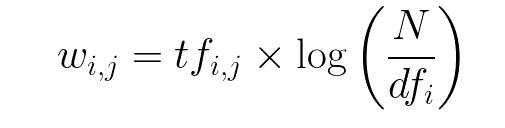

In [24]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [37]:
tfidfA = computeTFIDF(training_df, idfs)
tfidfB = computeTFIDF(testing_df, idfs)
dmafp_model = pd.DataFrame([tfidfA, tfidfB])

In [38]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([training_df, testing_df])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

Print the Keyword in the 10 topics

In [53]:
dmafp_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

pprint(dmafp_model.print_topics())